In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import chardet
with open(r"D:\dinesh document\EXCELR\Data Science\Assingment\Recommendation system\Book.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7175946711423477, 'language': ''}

In [16]:
book = pd.read_csv(r"D:\dinesh document\EXCELR\Data Science\Assingment\Recommendation system\Book.csv",encoding='ISO-8859-1')

## EDA

In [17]:
book.head()

,Index,User_ID,Book_Title,Book_Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [38]:
max(book['User_ID'])

278854

In [22]:
book.describe()

,Index,User_ID,Book_Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [6]:
## data information
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Index        10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [7]:
# check null value
book.isna().sum()

Index          0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

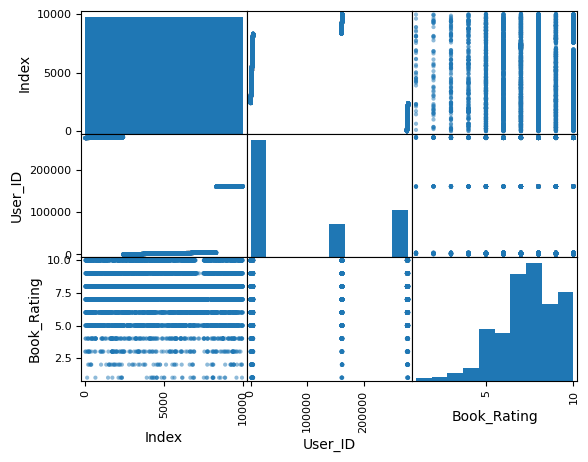

In [91]:
## Scatter plot & corr
pd.plotting.scatter_matrix(book)
plt.show()

In [89]:
## Correletion
book.corr()

,Index,User_ID,Book_Rating
Index,1.000000,-0.406308,-0.000228
User_ID,-0.406308,1.000000,-0.041523
Book_Rating,-0.000228,-0.041523,1.000000


## Visualization

<AxesSubplot:>

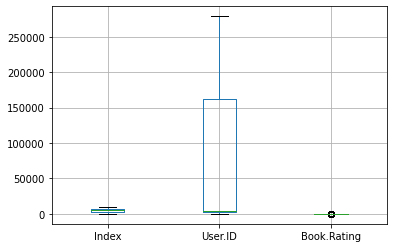

In [8]:
book.boxplot()

<AxesSubplot:>

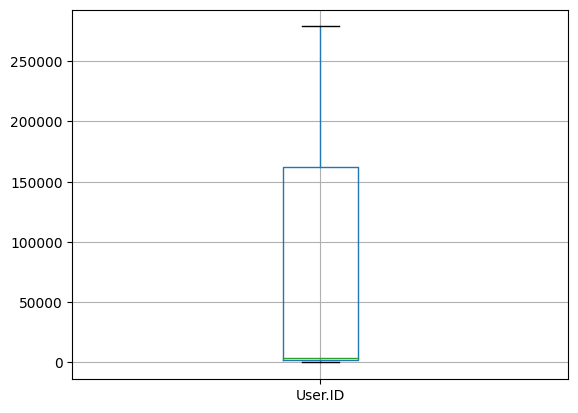

In [9]:
book[['User.ID']].boxplot()

<AxesSubplot:>

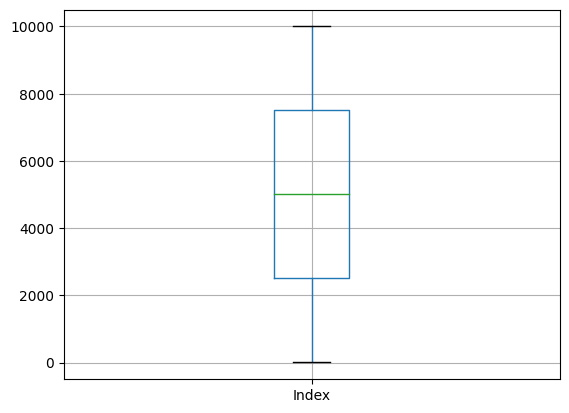

In [10]:
book[['Index']].boxplot()

<AxesSubplot:>

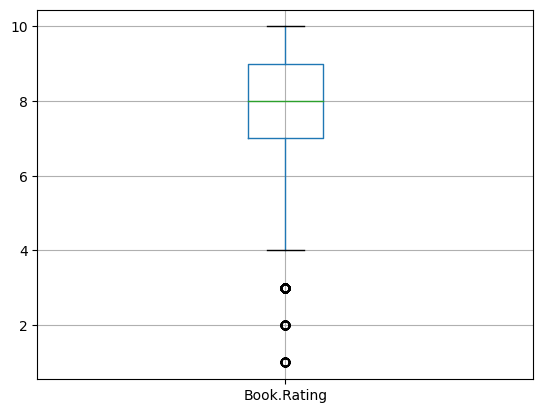

In [11]:
book[['Book.Rating']].boxplot()

In [12]:
out_indx1 = np.where(book['Book.Rating']<=3)
out_indx1[0]

array([   1,   19,  115,  144,  148,  160,  179,  244,  246,  255,  261,
        268,  346,  352,  379,  390,  588,  640,  646,  959,  962,  998,
       1009, 1087, 1092, 1152, 1328, 1442, 1464, 1489, 1503, 1539, 1595,
       1674, 1688, 1706, 1707, 1710, 1712, 1714, 1716, 1717, 1719, 1724,
       1782, 1804, 1811, 1821, 1841, 1854, 1885, 1926, 1962, 1973, 1979,
       1991, 2020, 2085, 2107, 2159, 2165, 2194, 2212, 2231, 2279, 2294,
       2316, 2320, 2321, 2323, 2329, 2343, 2416, 2427, 2436, 2460, 2493,
       2778, 2784, 2857, 2868, 2977, 3025, 3088, 3120, 3210, 3263, 3325,
       3365, 3366, 3368, 3369, 3381, 3395, 3399, 3403, 3461, 3505, 3677,
       3691, 3693, 3758, 3762, 3808, 3829, 3900, 4034, 4080, 4122, 4129,
       4213, 4231, 4241, 4270, 4290, 4332, 4337, 4367, 4413, 4493, 4510,
       4523, 4524, 4532, 4540, 4609, 4617, 4744, 4745, 4836, 4843, 4959,
       4993, 5021, 5124, 5172, 5335, 5349, 5370, 5394, 5443, 5522, 5524,
       5528, 5535, 5656, 5659, 5660, 5693, 5698, 57

In [13]:
book[book['Book.Rating']<=3]


,Index,User.ID,Book.Title,Book.Rating
1,2,276729,Clara Callan,3
19,20,276762,Beloved (Plume Contemporary Fiction),3
115,116,276853,A Kiss Remembered,1
144,145,276866,Hush,3
148,149,276866,Rebecca,3
...,...,...,...,...
9855,9856,162052,The End Of The Dream The Golden Boy Who Never ...,3
9861,9862,162052,Soon to Be a Major Motion Picture,2
9931,9932,162052,The Mediterranean Kitchen,2
9942,9943,162052,The Concrete Enema: And Other News of the Weir...,2


array([[<AxesSubplot:title={'center':'Book_Rating'}>,
        <AxesSubplot:title={'center':'Index'}>],
       [<AxesSubplot:title={'center':'User_ID'}>, <AxesSubplot:>]],
      dtype=object)

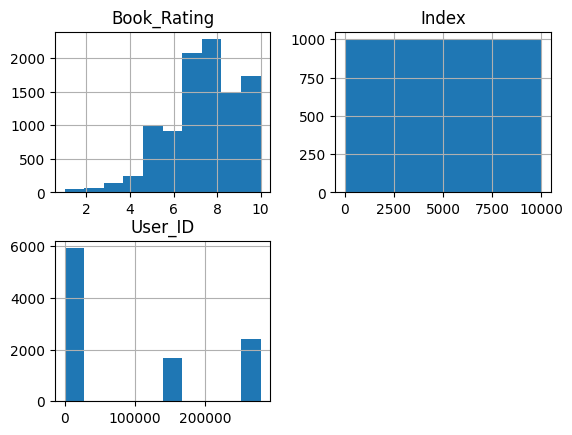

In [23]:
## Histogram
book.hist()

<AxesSubplot:>

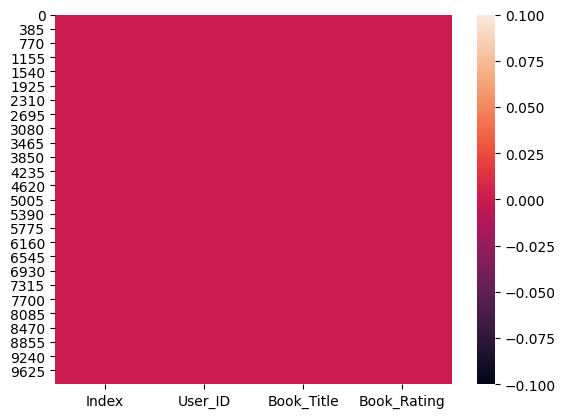

In [87]:
sns.heatmap(book.isnull())

### Recommendation_System

In [26]:
#number of unique users in the dataset
len(book.User_ID.unique())

2182

In [27]:
len(book.Book_Title.unique())

9659

In [28]:
len(book.Book_Rating.unique())

10

In [34]:
book_df = book.pivot_table(index='User_ID',
                                 columns='Book_Title',
                                 values='Book_Rating').reset_index(drop=True)

In [56]:
book_df.tail(5)

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
print(book_df['Classical Mythology'].unique())

[nan  5.]


In [57]:
#Impute those NaNs with 0 value
book_df.fillna(0, inplace=True)

In [58]:
book_df

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [60]:
user_book = 1 - pairwise_distances( book_df.values,metric='cosine')

In [61]:
user_book

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [62]:
#Store the results in a dataframe
user_book_df = pd.DataFrame(user_book)

In [64]:
#Set the index and column names to user ids 
user_book_df.index = book.User_ID.unique()
user_book_df.columns = book.User_ID.unique()

In [65]:
user_book_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [66]:
np.fill_diagonal(user_book, 0)
user_book_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [67]:
#Most Similar Users
user_book_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [68]:
book[(book['User_ID']==276729) | (book['User_ID']==276726)]

,Index,User_ID,Book_Title,Book_Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6


In [76]:
user_1=book[book['User_ID']==276726]

In [81]:
user_2=book[book['User_ID']==276729]

In [82]:
user_2.Book_Title

1            Clara Callan
2    Decision in Normandy
Name: Book_Title, dtype: object

In [83]:
user_1.Book_Title

0    Classical Mythology
Name: Book_Title, dtype: object

In [84]:
pd.merge(user_1,user_2,on='Book_Title',how='outer')

,Index_x,User_ID_x,Book_Title,Book_Rating_x,Index_y,User_ID_y,Book_Rating_y
0,1.0,276726.0,Classical Mythology,5.0,NaN,NaN,NaN
1,NaN,NaN,Clara Callan,NaN,2.0,276729.0,3.0
2,NaN,NaN,Decision in Normandy,NaN,3.0,276729.0,6.0
